##Data Generation

In [15]:
import pandas as pd
import random as rd

In [16]:
def read_names_from_txt(fp):
  with open(fp, 'r') as f:
    names = [line.strip() for line in f.readlines()]
  return names

In [17]:
# File from kaggle
f1="/content/male.txt"
f2="/content/female.txt"

In [18]:
nl=read_names_from_txt(f1)+read_names_from_txt(f2)
subjects=["Electronics","Programming","Database","Data Science","Mathematics","DSA"]
stu=[]
for i in range(1,10001):
  student={
      "Roll No.":i,
      "Name":rd.choice(nl)
  }
  for j in subjects:
    student[j]=rd.randint(27,100)
  stu.append(student)

In [19]:
studf=pd.DataFrame(stu)
studf.to_csv("students.csv",index=False)

##Data Analysis

In [20]:
d=pd.read_csv("students.csv")
d.head()

,Roll No.,Name,Electronics,Programming,Database,Data Science,Mathematics,DSA
0,1,Jae,81,54,97,32,69,78
1,2,Ezekiel,50,58,52,94,74,96
2,3,Hersch,93,83,84,62,94,74
3,4,Alyson,39,81,97,33,33,29
4,5,Dacy,61,61,31,37,80,87


In [21]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Roll No.      10000 non-null  int64 
 1   Name          10000 non-null  object
 2   Electronics   10000 non-null  int64 
 3   Programming   10000 non-null  int64 
 4   Database      10000 non-null  int64 
 5   Data Science  10000 non-null  int64 
 6   Mathematics   10000 non-null  int64 
 7   DSA           10000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 625.1+ KB


In [22]:
d.describe()

,Roll No.,Electronics,Programming,Database,Data Science,Mathematics,DSA
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,63.488500,63.355100,63.413400,63.526200,63.723600,63.429300
std,2886.89568,21.249598,21.279443,21.326087,21.110748,21.279194,21.424605
min,1.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
25%,2500.75000,45.000000,45.000000,45.000000,46.000000,46.000000,45.000000
50%,5000.50000,63.000000,63.000000,63.000000,64.000000,64.000000,63.000000
75%,7500.25000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000
max,10000.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [23]:
d.isna().sum()

,0
Roll No.,0
Name,0
Electronics,0
Programming,0
Database,0
Data Science,0
Mathematics,0
DSA,0


In [24]:
d.nunique()

,0
Roll No.,10000
Name,5476
Electronics,74
Programming,74
Database,74
Data Science,74
Mathematics,74
DSA,74


##Data Processing


In [25]:
#!pip install pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("RMS").getOrCreate()
data=spark.read.csv("students.csv",header=True,inferSchema=True)
data.show()

+--------+---------+-----------+-----------+--------+------------+-----------+---+
|Roll No.|     Name|Electronics|Programming|Database|Data Science|Mathematics|DSA|
+--------+---------+-----------+-----------+--------+------------+-----------+---+
|       1|      Jae|         81|         54|      97|          32|         69| 78|
|       2|  Ezekiel|         50|         58|      52|          94|         74| 96|
|       3|   Hersch|         93|         83|      84|          62|         94| 74|
|       4|   Alyson|         39|         81|      97|          33|         33| 29|
|       5|     Dacy|         61|         61|      31|          37|         80| 87|
|       6|   Mariam|         30|         73|      33|          36|         95| 75|
|       7|    Clair|         45|         77|      70|          53|         41| 49|
|       8|  Reynold|         53|         38|      36|          70|         59| 87|
|       9|  Bettina|         54|         86|      81|          40|         83| 39|
|   

##Data in Dashboard

In [26]:
import matplotlib.pyplot as plt
import seaborn as sea

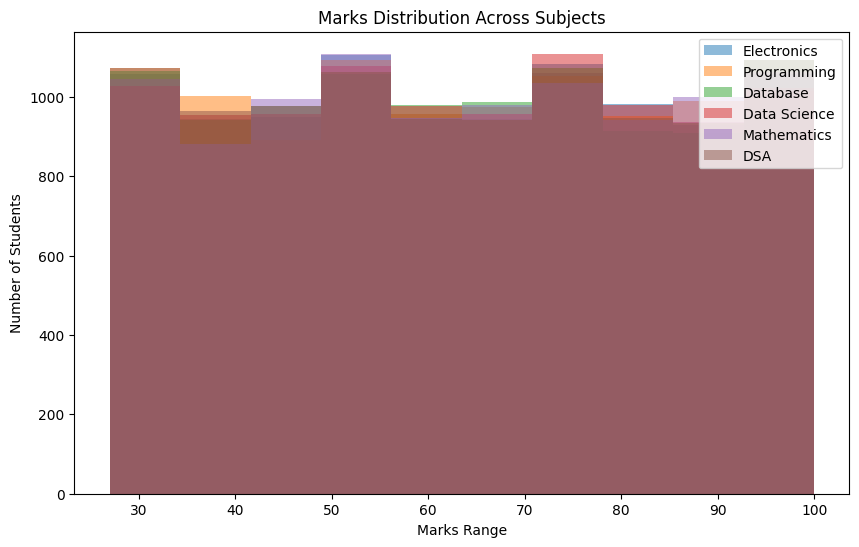

In [38]:
plt.figure(figsize=(10,6))
dff=data.toPandas()
for s in subjects:
  plt.hist(dff[s],bins=10,alpha=0.5,label=s)
plt.xlabel("Marks Range")
plt.ylabel("Number of Students")
plt.title("Marks Distribution Across Subjects")
plt.legend()
plt.show()

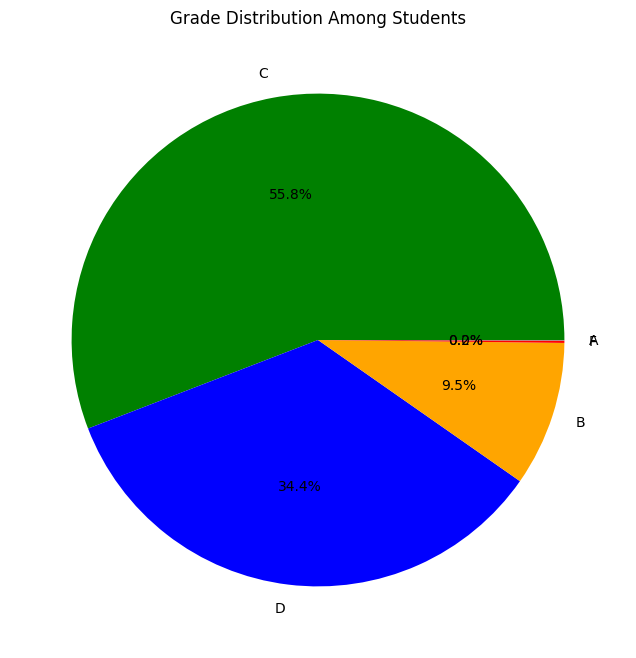

In [46]:
d.iloc[:, 1:] = d.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

d["Average Marks"] = d.iloc[:, 1:].mean(axis=1)

def assign_grade(marks):
    if marks >= 90:
        return "A"
    elif marks >= 75:
        return "B"
    elif marks >= 60:
        return "C"
    elif marks >= 40:
        return "D"
    else:
        return "F"

d["Grade"] = d["Average Marks"].apply(assign_grade)
grade_counts = d["Grade"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct="%1.1f%%", colors=["green", "blue", "orange", "red", "gray"])
plt.title("Grade Distribution Among Students")
plt.show()
